[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer96/sisl/GridPlot?style=for-the-badge)](https://github.com/pfebrer96/sisl/labels/GridPlot)

GridPlot
=========

`GridPlot` class will help you very easily display any `Grid`. 

<div class="alert alert-info">
    
Note
    
Dedicated software like VESTA might be faster in rendering big 3D grids, but the strength of this plot class lies in its great **flexibility**, **tunability** (change settings as you wish to customize the display from python) **and convenience** (no need to open another software, you can see the grid directly in your notebook). Also, you can **combine your grid plots** however you want **with the other plot classes** in the framework.

</div>

In [1]:
import sisl
import sisl.viz

import sisl._environ
# This is just for convenience to retreive files
siesta_files = sisl._environ.get_environ_variable("SISL_FILES_TESTS") / "sisl" / "io" / "siesta"

The first thing that we need to do to plot a grid is having a grid, so let's get one!

In this case, we are going to use an electronic density grid from a `.RHO` file in SIESTA. There are multiple ways of getting the plot:

In [2]:
rho_file = siesta_files / "SrTiO3.RHO"

# From a sisl grid, you can do grid.plot()
grid = sisl.get_sile(rho_file).read_grid()
plot = grid.plot()

# All siles that implement read_grid can also be directly plotted
plot = sisl.get_sile(rho_file).plot()

# Using the Plot class, perhaps the cleaner one, but needs an extra import
from sisl.viz import Plot
plot = Plot(rho_file)

Anyway, you will end up having the grid under `plot.grid`.

Let's see what we've got:

In [3]:
plot

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'SrTiO3.RHO',
              'showlegend': …

Well, this doesn't look much like a grid, does it? By default, `GridPlot` only shows the third axis of the grid, while averaging along the others. This is because plotly **can really struggle trying to plot an enormous 3d grid**, to the point that it can leave your computer stuck.

## Plotting in 3D, 2D and 1D

Much like [GeometryPlot](GeometryPlot.ipynb), you can select the axes of the grid that you want to display. In this case, the other axes will be averaged.

For example, if we want to see the xy plane of the electronic density, we can do: 

In [4]:
plot.update_settings(axes=[0,1])

FigureWidget({
    'data': [{'name': 'SrTiO3.RHO',
              'showlegend': True,
              'type': 'he…

Note that you can make 2d representations look smoother without having to make the grid finer by using the `zsmooth` setting, which is part of plotly's `go.Heatmap` trace options.

In [5]:
plot.update_settings(zsmooth="best")

FigureWidget({
    'data': [{'name': 'SrTiO3.RHO',
              'showlegend': True,
              'type': 'he…

3d representations of a grid will display isosurfaces:

In [6]:
plot.update_settings(axes=[0,1,2])

FigureWidget({
    'data': [{'i': array([   2,    2,    0, ..., 3488, 3488, 3542], dtype=int32),
             …

## Isosurfaces and contours

There's one parameter that controls both the display of isosurfaces (in 3d) and contours (in 2d): `isos`.

`isos` is a list of dicts where each dict asks for an isovalue. See the help message:

In [7]:
print(plot.get_param("isos").help)

The isovalues that you want to represent.
            The way they will be represented is of course dependant on the type of representation:
                - 2D representations: A contour (i.e. a line)
                - 3D representations: A surface
            

 Each item is a dict. Structure of the expected dicts:{
	'name': The name of the iso query. Note that you can use $isoval$ as a template to indicate where the isoval should go.
	'val': The iso value. If not provided, it will be infered from `frac`
	'frac': If val is not provided, this is used to calculate where the isosurface should be drawn.
                    It calculates them from the minimum and maximum values of the grid like so:
                    If iso_frac = 0.3:
                    (min_value-----ISOVALUE(30%)-----------max_value)
                    Therefore, it should be a number between 0 and 1.
                    
	'step_size': The step size to use to calculate the isosurface in case it's a 3D representatio

If no `isos` is provided, 3d representations plot the 0.3 and 0.7 (`frac`) isosurfaces. This is what you can see in the 3d plot that we displayed above.

Let's play a bit with `isos`. The first thing I will do is change the opacity of the outer isosurface, since there's no way to see the inner one right now (although you can toggle it by clicking at the legend, courtesy of plotly :)).

In [8]:
plot.update_settings(isos=[{"frac": 0.3, "opacity": 0.4}, {"frac": 0.7}])

FigureWidget({
    'data': [{'i': array([   2,    2,    0, ..., 3488, 3488, 3542], dtype=int32),
             …

Now we can see all the very interesting features of the inner isosurface! :)

Let's now see how contours look in 2d:

In [9]:
plot.update_settings(axes=[0,1])

FigureWidget({
    'data': [{'name': 'SrTiO3.RHO',
              'showlegend': True,
              'type': 'he…

Not bad.

## Colorscales

You might have already seen that 2d representations use a colorscale. You can change it with the `colorscale` setting.

In [10]:
plot.update_settings(isos=[], colorscale="temps")

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(0, 147, 146)'], [0.16666666666666666,
                 …

And you can control its range using `crange` (min and max bounds of the colorscale) and `cmid` (middle value of the colorscale, will take preference over `crange`). In this way, you are able **saturate the display as you wish**. 

For example, in this case, if we bring the lower bound up enough, we will be able to hide the Sr atoms that are in the corners. But be careful not to make it so high that you hide the oxygens as well!

In [11]:
plot.update_settings(crange=[1,4])

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(0, 147, 146)'], [0.16666666666666666,
                 …

## Using only part of the grid

As we can see in the 3d representation of the electronic density, there are two atoms contributing to the electronic density in the center, that's why we get such a big difference in the 2d heatmap.

We can use the `x_range`, `ỳ_range` and `z_range` settings to take into account only a certain part of the grid. for example, in this case we want only the grid where `z` is in the `[1,3]` interval so that we remove the influence of the oxygen atom that is on top.

In [12]:
plot.update_settings(z_range=[1,3])

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(0, 147, 146)'], [0.16666666666666666,
                 …

Now we are seeing the real difference between the Ti atom (in the center) and the O atoms (at the edges).

## Applying transformations

One can apply as many transformations as it wishes to the grid by using the `transforms` setting. 

It should be a list where each item can be a string (the name of the function, e.g. `"numpy.sin"`) or a function. Each transform is passed to `Grid.apply`, see the method for more info.

In [13]:
plot.update_settings(transforms=[abs, "numpy.sin"], crange=None)

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(0, 147, 146)'], [0.16666666666666666,
                 …

Notice that the order of the transformations matter:

In [14]:
plot.update_settings(transforms=["sin", abs], crange=None) 
# If a string is provided with no module, it will be interpreted as a numpy function
# Therefore "sin" == "numpy.sin" and abs != "abs" == "numpy.abs"

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(0, 147, 146)'], [0.16666666666666666,
                 …

## Visualizing supercells

Visualizing grid supercells is as easy as using the `sc` setting. If we want to repeat our grid visualization along the second axis 3 times, we just do:

In [15]:
plot.update_settings(nsc=[1,3,1])

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(0, 147, 146)'], [0.16666666666666666,
                 …

## Performing scans

We can use the `scan` method to create a scan of the grid along a given direction. If we have a 2d representation, the scan will be performed along the other axis by default, but we can choose in which direction we want to scan.

In [16]:
plot.scan(num=5)

ValueError: Only one of ('step', 'num', 'breakpoints') should be passed.

Notice how the scan respected our `z_range` from 1 to 3. If we want the rest of the grid, we can set `z_range` back to `None` before creating the scan, or we can indicate the bounds of the scan.

In [17]:
plot.scan(along=2, start=0, stop=plot.grid.cell[2,2], num=10)

ValueError: Only one of ('step', 'num', 'breakpoints') should be passed.

This is the `"moving_slice"` scan, but we can also display the scan as an animation:

In [18]:
plot.scan(mode="as_is", num=15)

ValueError: Only one of ('step', 'num', 'breakpoints') should be passed.

This mode is called `"as_is"` because **it creates an animation of the current representation**. That is, it can scan through 1d, 2d and 3d representations and it keeps displaying the supercell.

Here's a scan of 1d data:

In [19]:
plot.update_settings(axes=[2]).scan(mode="as_is", num=15)

ValueError: Only one of ('step', 'num', 'breakpoints') should be passed.

We hope you enjoyed what you learned!

-----
This next cell is just to create the thumbnail for the notebook in the docs 

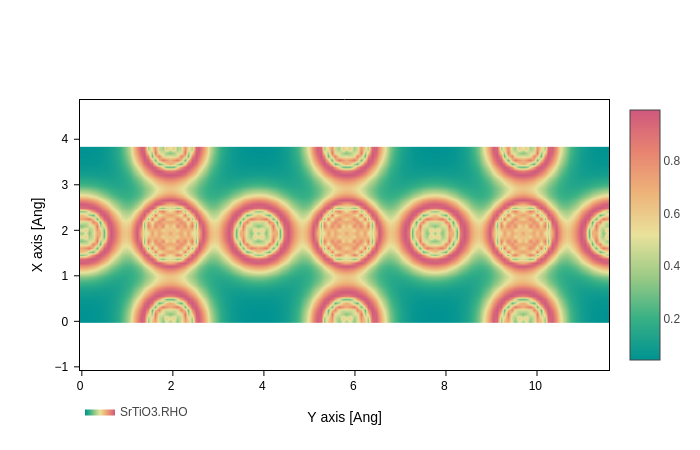

In [20]:
thumbnail_plot = plot.update_settings(axes=[1,0], z_range=[1.7, 1.9])

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------